<a href="https://colab.research.google.com/github/nikhilsingh-hub/Covid-19-predictor/blob/main/CNN_LSTM91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from tensorflow import keras
from PIL.Image import fromarray
import matplotlib.pyplot as plt

In [ ]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
import tensorflow as tf
import keras
from keras.preprocessing.sequence import TimeseriesGenerator
from scipy import stats
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv3D,Conv2D, MaxPooling2D,TimeDistributed,LSTM,ConvLSTM2D
from keras.utils import np_utils

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
import os
from keras.preprocessing.image import img_to_array

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
paths=['/content/drive/MyDrive/xray/normal',
       '/content/drive/MyDrive/xray/covid']

In [ ]:
A = []
B =  []

for label, path in  enumerate(paths):
    for img_path in os.listdir(path):
        A.append(img_to_array(fromarray(cv2.resize(cv2.imread(os.path.join(path, img_path), cv2.IMREAD_GRAYSCALE), (256,256)))))
        B.append(label)

A = np.array(A)
B = np.array(B)

In [ ]:
A /= 255.0

In [ ]:
print(A.shape)
print(B.shape)

(4648, 256, 256, 1)
(4648,)


In [ ]:
import seaborn as sns
import pandas as pd
from keras.preprocessing.image import array_to_img

In [ ]:
pd.DataFrame({'id':B})

,id
0,0
1,0
2,0
3,0
4,0
...,...
4643,1
4644,1
4645,1
4646,1


Text(0.5, 1.0, 'Freq of covid patients |  freq of non-covid patients')

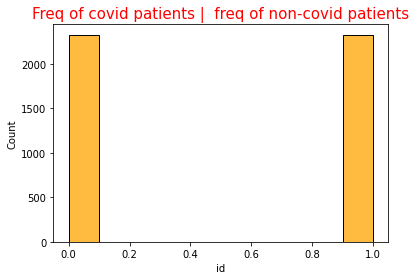

In [ ]:
sns.histplot(pd.DataFrame({'id' : B}), x = 'id',binwidth = 0.1,color='orange')
plt.title('Freq of covid patients |  freq of non-covid patients', fontsize = 15 , color ='red')

In [ ]:
info = {
    0 : 'Non Covid Scan',
    1 : 'Covid Scan'}

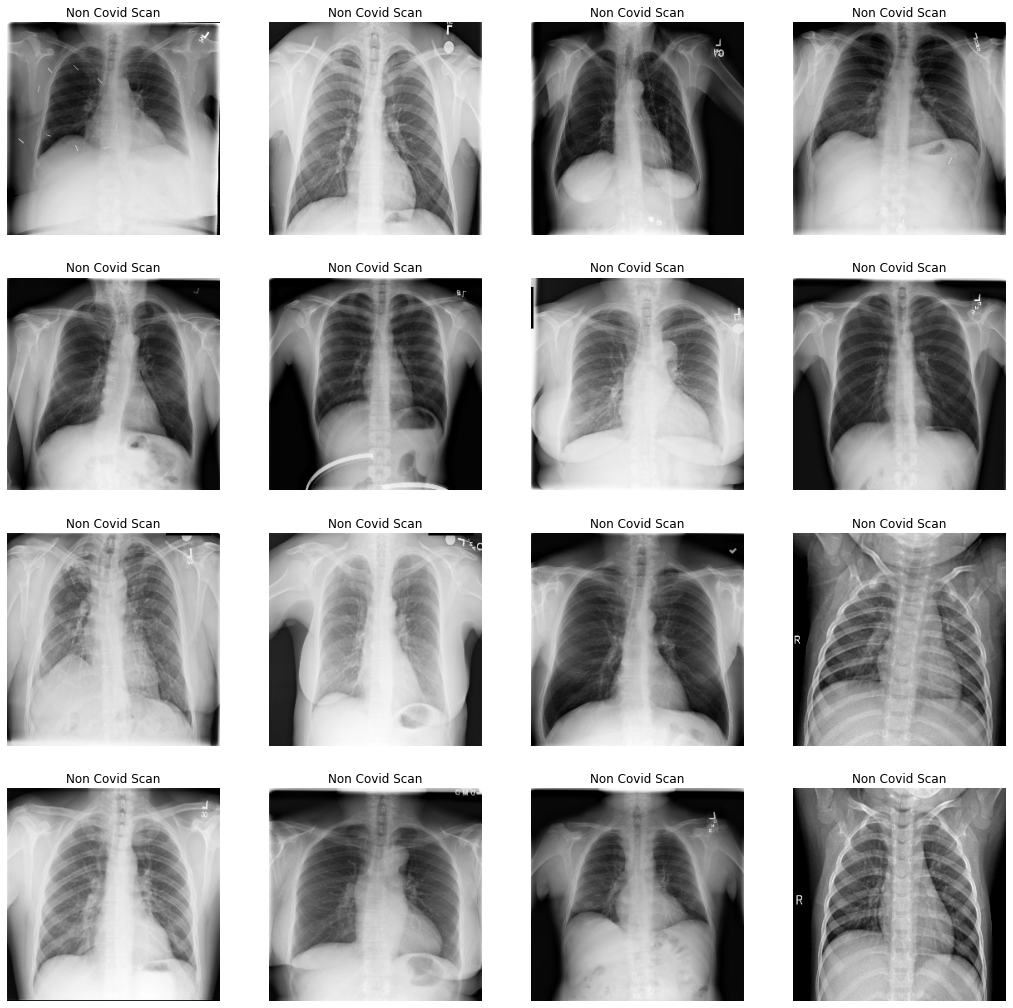

In [ ]:
plt.figure(figsize = (18,18))

i = 0

while i < 16 :

    x = np.random.randint(0, 2481)
    plt.subplot(4, 4, i + 1)
    plt.imshow(array_to_img(A[x]), 'gray')
    plt.title(info[B[x]])
    plt.axis('off')

    i += 1
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size = .1, random_state = 1)

In [ ]:
print(A_train.shape)
print(B_train.shape)

(4183, 256, 256, 1)
(4183,)


In [ ]:
print(A_test.shape)
print(B_test.shape)

(465, 256, 256, 1)
(465,)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
for_train = ImageDataGenerator(rotation_range = 5, zoom_range = [0.9, 1.2], horizontal_flip = True,
                               height_shift_range = [-5,5], width_shift_range = [-5,5])

In [ ]:
for_train.fit(A_train)

In [ ]:
pointer = for_train.flow(A_train, B_train)

In [ ]:
a, b = pointer.next()

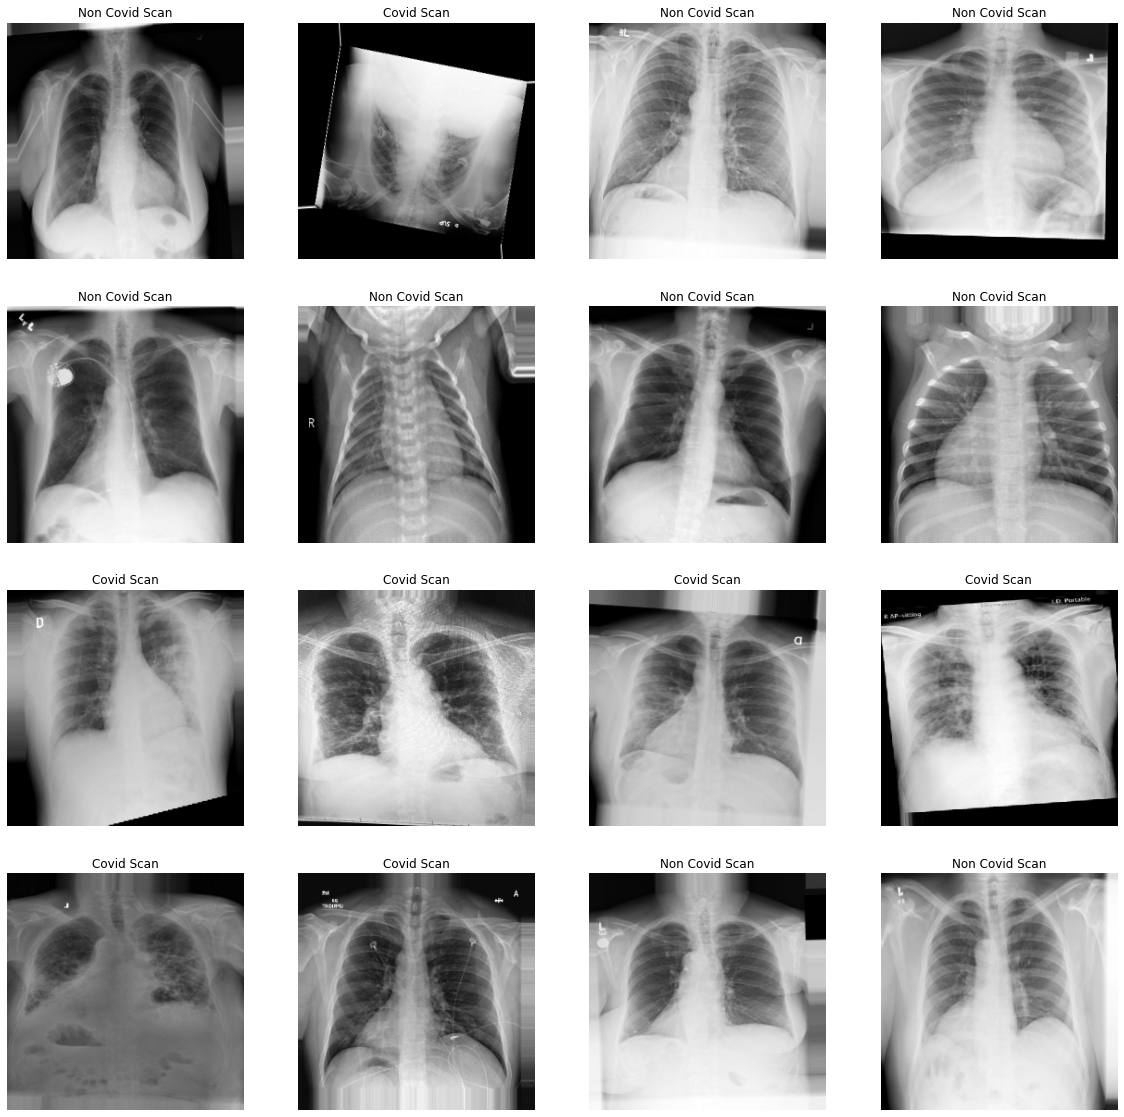

In [ ]:
plt.figure(figsize = (20,20))

i = 0

while i < 16 :

    plt.subplot(4, 4, i + 1)
    plt.imshow(array_to_img(a[i]), 'gray')
    plt.title(info[b[i]])
    plt.axis('off')

    i += 1
plt.show()

In [ ]:
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects
from tensorflow.nn import relu

In [ ]:
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization

In [ ]:
def create_model():

    model= Sequential()
    model.add(layers.Input((256,256,1,)))
    model.add(layers.Conv2D(10, (3,3), padding = 'same', kernel_regularizer = 'l2'))
    model.add(layers.BatchNormalization())
    # model.add(layers.Dropout(.2))
    model.add(layers.LeakyReLU())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(32, (3,3), padding = 'same', kernel_regularizer = 'l2'))
    model.add(layers.BatchNormalization())

    model.add(layers.Conv2D(64, (3,3), padding = 'same', kernel_regularizer = 'l2'))
    model.add(layers.BatchNormalization())

    model.add(layers.Conv2D(128, (3,3), padding = 'same', kernel_regularizer = 'l2'))
    model.add(layers.BatchNormalization())
    # model.add(layers.Dropout(.2))
    model.add(layers.LeakyReLU())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.BatchNormalization())

    model.add(layers.TimeDistributed(Flatten()))
    model.add(layers.LSTM(128, return_sequences= True, activation = 'tanh'))
    model.add(layers.LSTM(60, activation = 'tanh'))

    model.add(layers.Dense(64, kernel_regularizer = 'l2'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(.2))
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(32, kernel_regularizer = 'l2'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(.2))
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(1,activation = 'sigmoid'))
    return model

model = create_model()

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 256, 256, 10)      100       
                                                                 
 batch_normalization_7 (Batc  (None, 256, 256, 10)     40        
 hNormalization)                                                 
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 256, 256, 10)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 128, 128, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      2912      
                                                                 
 batch_normalization_8 (Batc  (None, 128, 128, 32)    

In [ ]:
from keras.callbacks import Callback,ModelCheckpoint,ReduceLROnPlateau

In [ ]:
learning_rate = 1e-3

optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)

model.compile(optimizer = optimizer,
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = 'accuracy')


reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy',
                                                 factor = 0.5,
                                                 patience = 1,
                                                 verbose = 1,
                                                 min_delta = 1e-4,
                                                 min_lr = 1e-7,
                                                 mode = 'max')

earlystopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                 min_delta = 1e-4,
                                                 patience = 5,
                                                 mode = 'max',
                                                 restore_best_weights = True,
                                                 verbose = 1)

checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath = './iv3_e15.hdf5',
                                                  monitor = 'val_accuracy',
                                                  verbose = 1,
                                                  save_best_only = True,
                                                  save_weights_only = True,
                                                  mode = 'max')

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
tf.keras.utils.plot_model(model, './covid_model.png', show_shapes = True)

In [ ]:
history = model.fit(for_train.flow(A_train, B_train, batch_size = 64), epochs = 12,
                    validation_data = (A_test, B_test), callbacks = [reduce_lr])

Epoch 1/12
66/66 [==============================] - 1335s 20s/step - loss: 2.1919 - accuracy: 0.7930 - val_loss: 1.8421 - val_accuracy: 0.5247 - lr: 0.0010
Epoch 2/12
66/66 [==============================] - ETA: 0s - loss: 1.5696 - accuracy: 0.8236 
Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
66/66 [==============================] - 1305s 20s/step - loss: 1.5696 - accuracy: 0.8236 - val_loss: 1.3348 - val_accuracy: 0.5226 - lr: 0.0010
Epoch 3/12
66/66 [==============================] - ETA: 0s - loss: 1.2919 - accuracy: 0.8480 
Epoch 00003: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
66/66 [==============================] - 1335s 20s/step - loss: 1.2919 - accuracy: 0.8480 - val_loss: 1.2487 - val_accuracy: 0.5226 - lr: 2.0000e-04
Epoch 4/12
66/66 [==============================] - 1381s 21s/step - loss: 1.2405 - accuracy: 0.8766 - val_loss: 1.2321 - val_accuracy: 0.5419 - lr: 4.0000e-05
Epoch 5/12
66/66 [====================

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
B_pred = model.predict(A_test, verbose = 1)

15/15 [==============================] - 38s 2s/step


In [ ]:
B_pred = np.around(B_pred)

In [ ]:
print(f'Number of 0 labels in test dataset : {B_test[B_test == 0].shape[0]}')
print(f'Number of 1 labels in test dataset : {B_test[B_test == 1].shape[0]}')

Number of 0 labels in test dataset : 222
Number of 1 labels in test dataset : 243


In [ ]:
print(f'Number of 0 labels in pred dataset : {B_pred[B_pred == 0].shape[0]}')
print(f'Number of 1 labels in pred dataset : {B_pred[B_pred == 1].shape[0]}')

Number of 0 labels in pred dataset : 224
Number of 1 labels in pred dataset : 241


In [ ]:
print(classification_report(B_test, B_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       222
           1       0.92      0.91      0.92       243

    accuracy                           0.91       465
   macro avg       0.91      0.91      0.91       465
weighted avg       0.91      0.91      0.91       465



In [ ]:
print(f"Loss: {history.history['loss'][-1]}")
print(f"accuracy: {history.history['accuracy'][-1]}")
print(f"Validation accuracy: {history.history['val_accuracy'][-1]}")

Loss: 1.1108633279800415
accuracy: 0.909395158290863
Validation accuracy: 0.9139785170555115


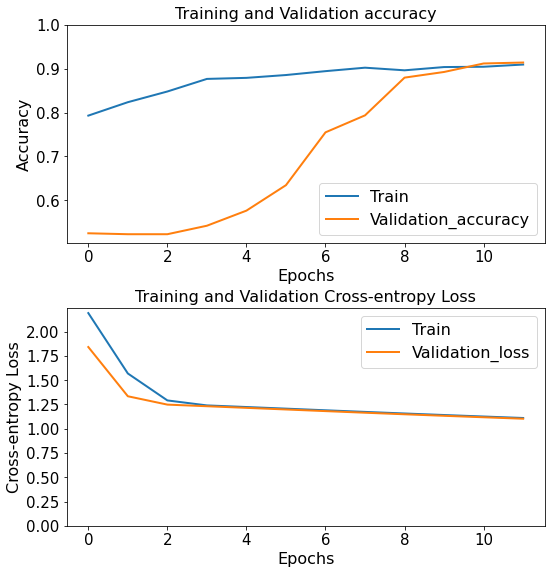

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.tight_layout(pad=2.0)
plt.plot(acc, label='Train' , linewidth = 2)
plt.plot(val_acc, label='Validation_accuracy', linewidth = 2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='lower right' , prop={'size': 16})
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy' , fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation accuracy', fontsize=16)

plt.subplot(2, 1, 2)
plt.tight_layout(pad=2.0)
plt.plot(loss, label='Train', linewidth = 2)
plt.plot(val_loss, label='Validation_loss', linewidth = 2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', prop={'size': 16})
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Cross-entropy Loss', fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Cross-entropy Loss', fontsize=16)
plt.show()

In [ ]:
cm = confusion_matrix(B_test, B_pred,normalize='true')
disease_types = ['Covid','non-Covid']

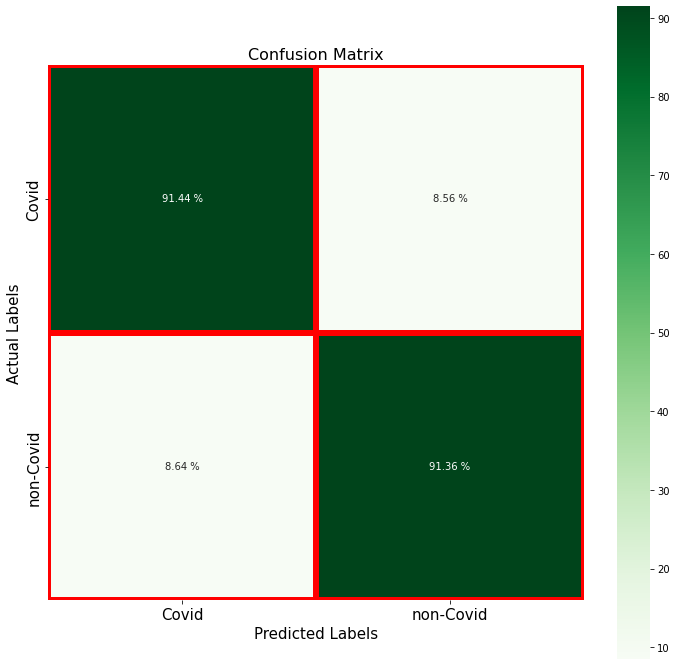

In [ ]:
plt.figure(figsize = (12,12))
ax = sns.heatmap(cm*100, cmap=plt.cm.Greens,linecolor='red',linewidths=5,annot=True, fmt='.2f',square=True, xticklabels = disease_types, yticklabels=disease_types)
for t in ax.texts: t.set_text(t.get_text() + " %")
plt.title('Confusion Matrix',fontsize = 16)
plt.ylabel('Actual Labels',fontsize = 15)
plt.xlabel('Predicted Labels', fontsize = 15)
plt.yticks(verticalalignment = 'center')
ax.xaxis.set_ticklabels(disease_types,fontsize = 15); ax.yaxis.set_ticklabels(disease_types,fontsize = 15)
plt.show()